## Wine quality predictor

In this project we will use the dataset Wine Quality Dataset, which can be found here https://www.kaggle.com/yasserh/wine-quality-dataset, to generate a machine learning algorithm whose aim is to predict the quality of a given wine. To predict the quality, the algorithm will need as inputs some specific information about the chemical composition of the wine. The wine's quality will be given by a numeric calification, an integer number between 1 and 10. We will follow the data science workflow to make thi project, as illustrated below
![alt text](datascience_workflow.jpeg "Title")
Image taken from https://towardsdatascience.com/the-data-science-process-a19eb7ebc41b.

In [1]:
# We define all the packages necessaries for all the project
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn import metrics

In [2]:
# We import the csv file as a panda's Data Frame object
data = pd.read_csv('WineQT.csv', sep=',')

# We need to understand the structure of the dataset, so we ask pandas about it
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [3]:
# We check if there are some missing values in the columns
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Great! We have a dataset of 13 columns. 11 are columns regarding the information needed to predict a qualification for the wines (inputs) and 1 (quality column) is the column needed to compare the predictions during the training of the model (target). The ID column is not meaningful to this project. Also, we have 1143 inputs to train the model, a relatively good number of inputs since the number of different wines all around the world is not much greater than this. As we can see, there are no missing values in the dataset, so it is not necessary to clean the dataset. Let us start exploring the data.

In [4]:
# Let us get some statistical information about the dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [5]:
# Let us calculate the skewness of the features to see its asymmetry respect to its mean.
data.drop(["Id", "quality"], axis=1).skew()

fixed acidity           1.044930
volatile acidity        0.681547
citric acid             0.371561
residual sugar          4.361096
chlorides               6.026360
free sulfur dioxide     1.231261
total sulfur dioxide    1.665766
density                 0.102395
pH                      0.221138
sulphates               2.497266
alcohol                 0.863313
dtype: float64

Let us make some histograms and count plots to visualize better the data

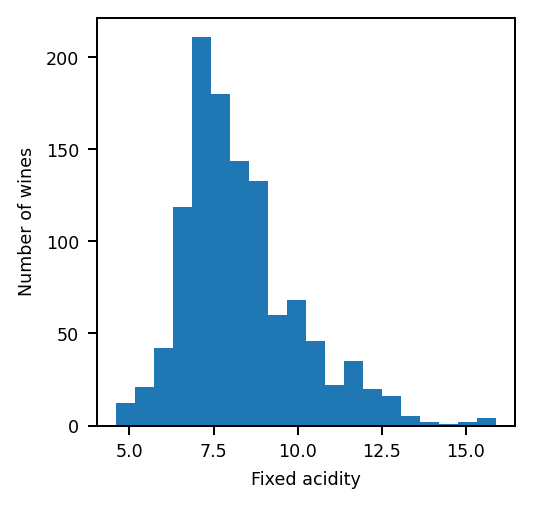

In [6]:
# Histogram of the fixed acidity column
plt.hist(data['fixed acidity'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('Fixed acidity', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

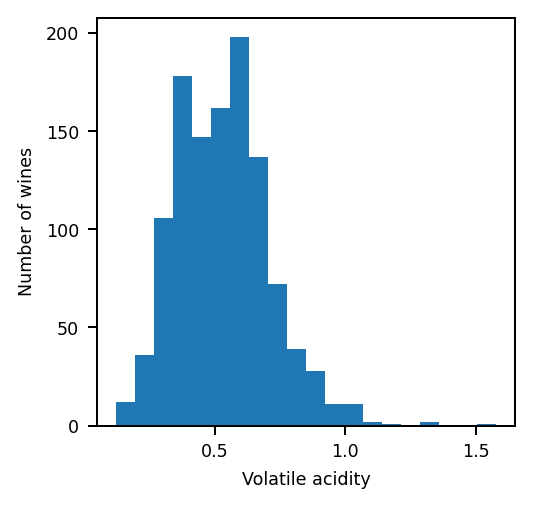

In [7]:
# Histogram of the volatile acidity column
plt.hist(data['volatile acidity'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('Volatile acidity', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

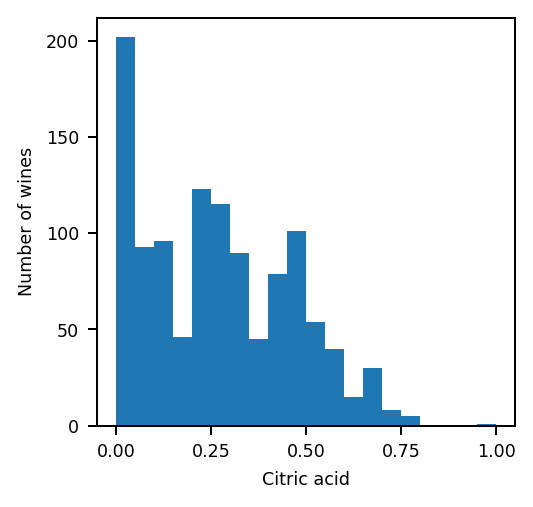

In [8]:
# Histogram of the citric acid column
plt.hist(data['citric acid'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('Citric acid', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

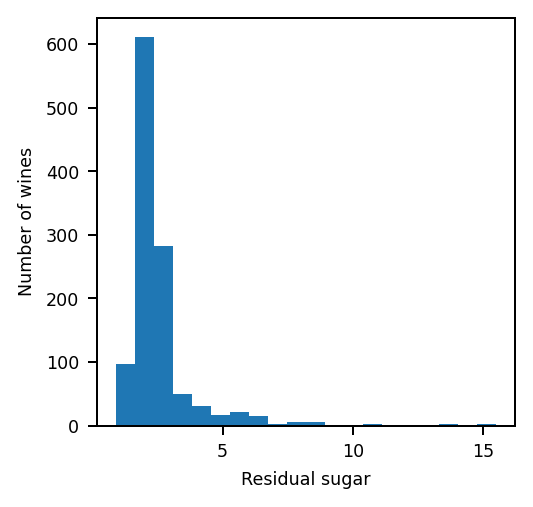

In [9]:
# Histogram of the residual sugar column
plt.hist(data['residual sugar'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('Residual sugar', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

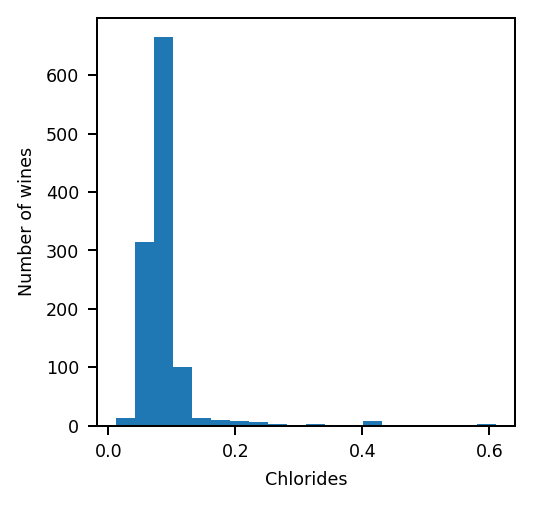

In [10]:
# Histogram of the chlorides column
plt.hist(data['chlorides'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('Chlorides', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

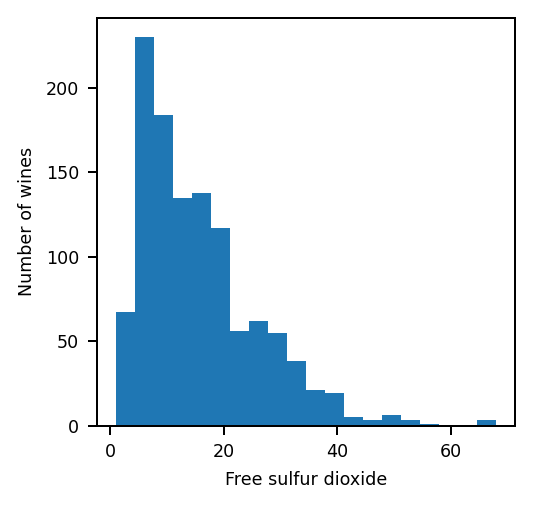

In [11]:
# Histogram of the free sulfur dioxide column
plt.hist(data['free sulfur dioxide'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('Free sulfur dioxide', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

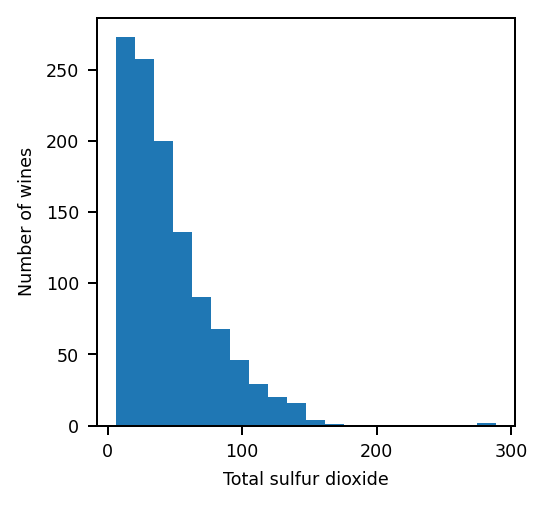

In [12]:
# Histogram of the total sulfur dioxide column
plt.hist(data['total sulfur dioxide'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('Total sulfur dioxide', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

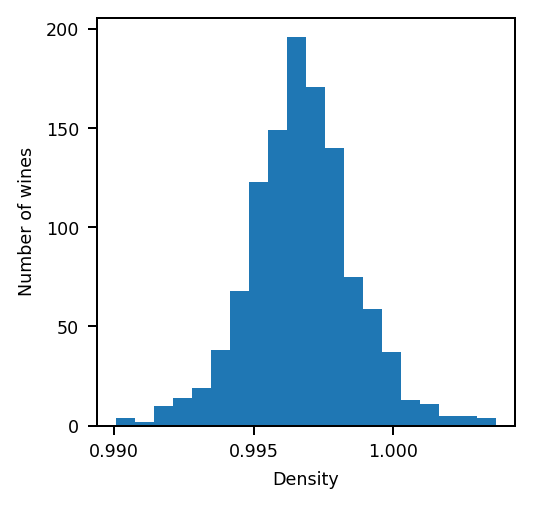

In [13]:
# Histogram of the density column
plt.hist(data['density'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('Density', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

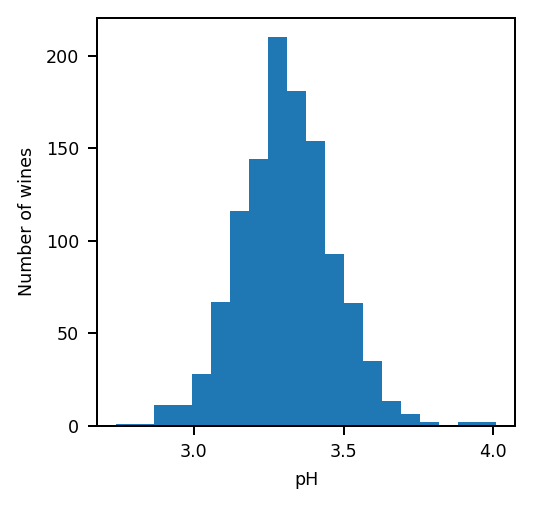

In [14]:
# Histogram of the pH column
plt.hist(data['pH'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('pH', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

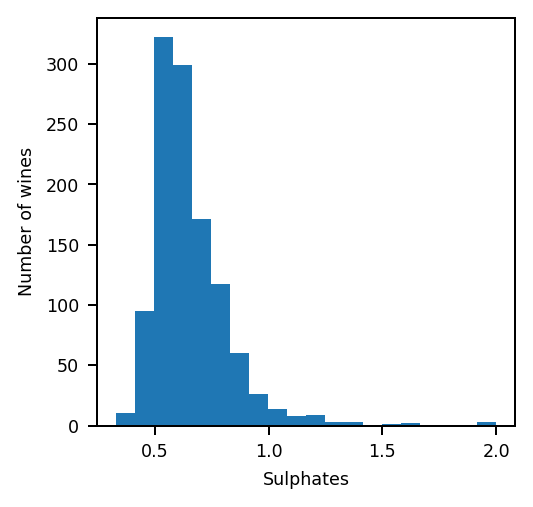

In [15]:
# Histogram of the sulphates column
plt.hist(data['sulphates'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('Sulphates', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

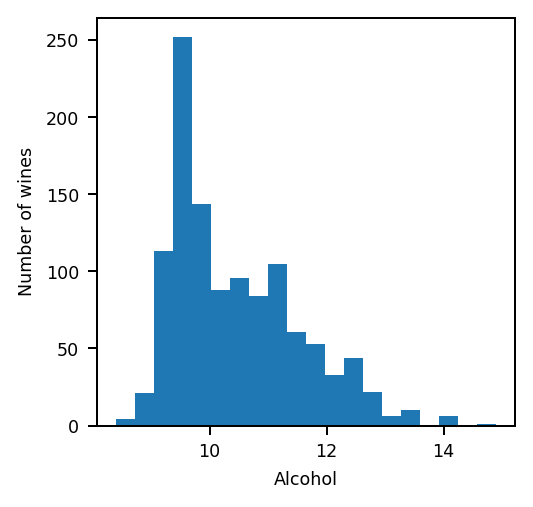

In [16]:
# Histogram of the alcohol column
plt.hist(data['alcohol'].values, bins=20, figure=plt.figure(figsize=(3,3), dpi=180))
plt.xlabel('Alcohol', fontsize=7)
plt.ylabel('Number of wines', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

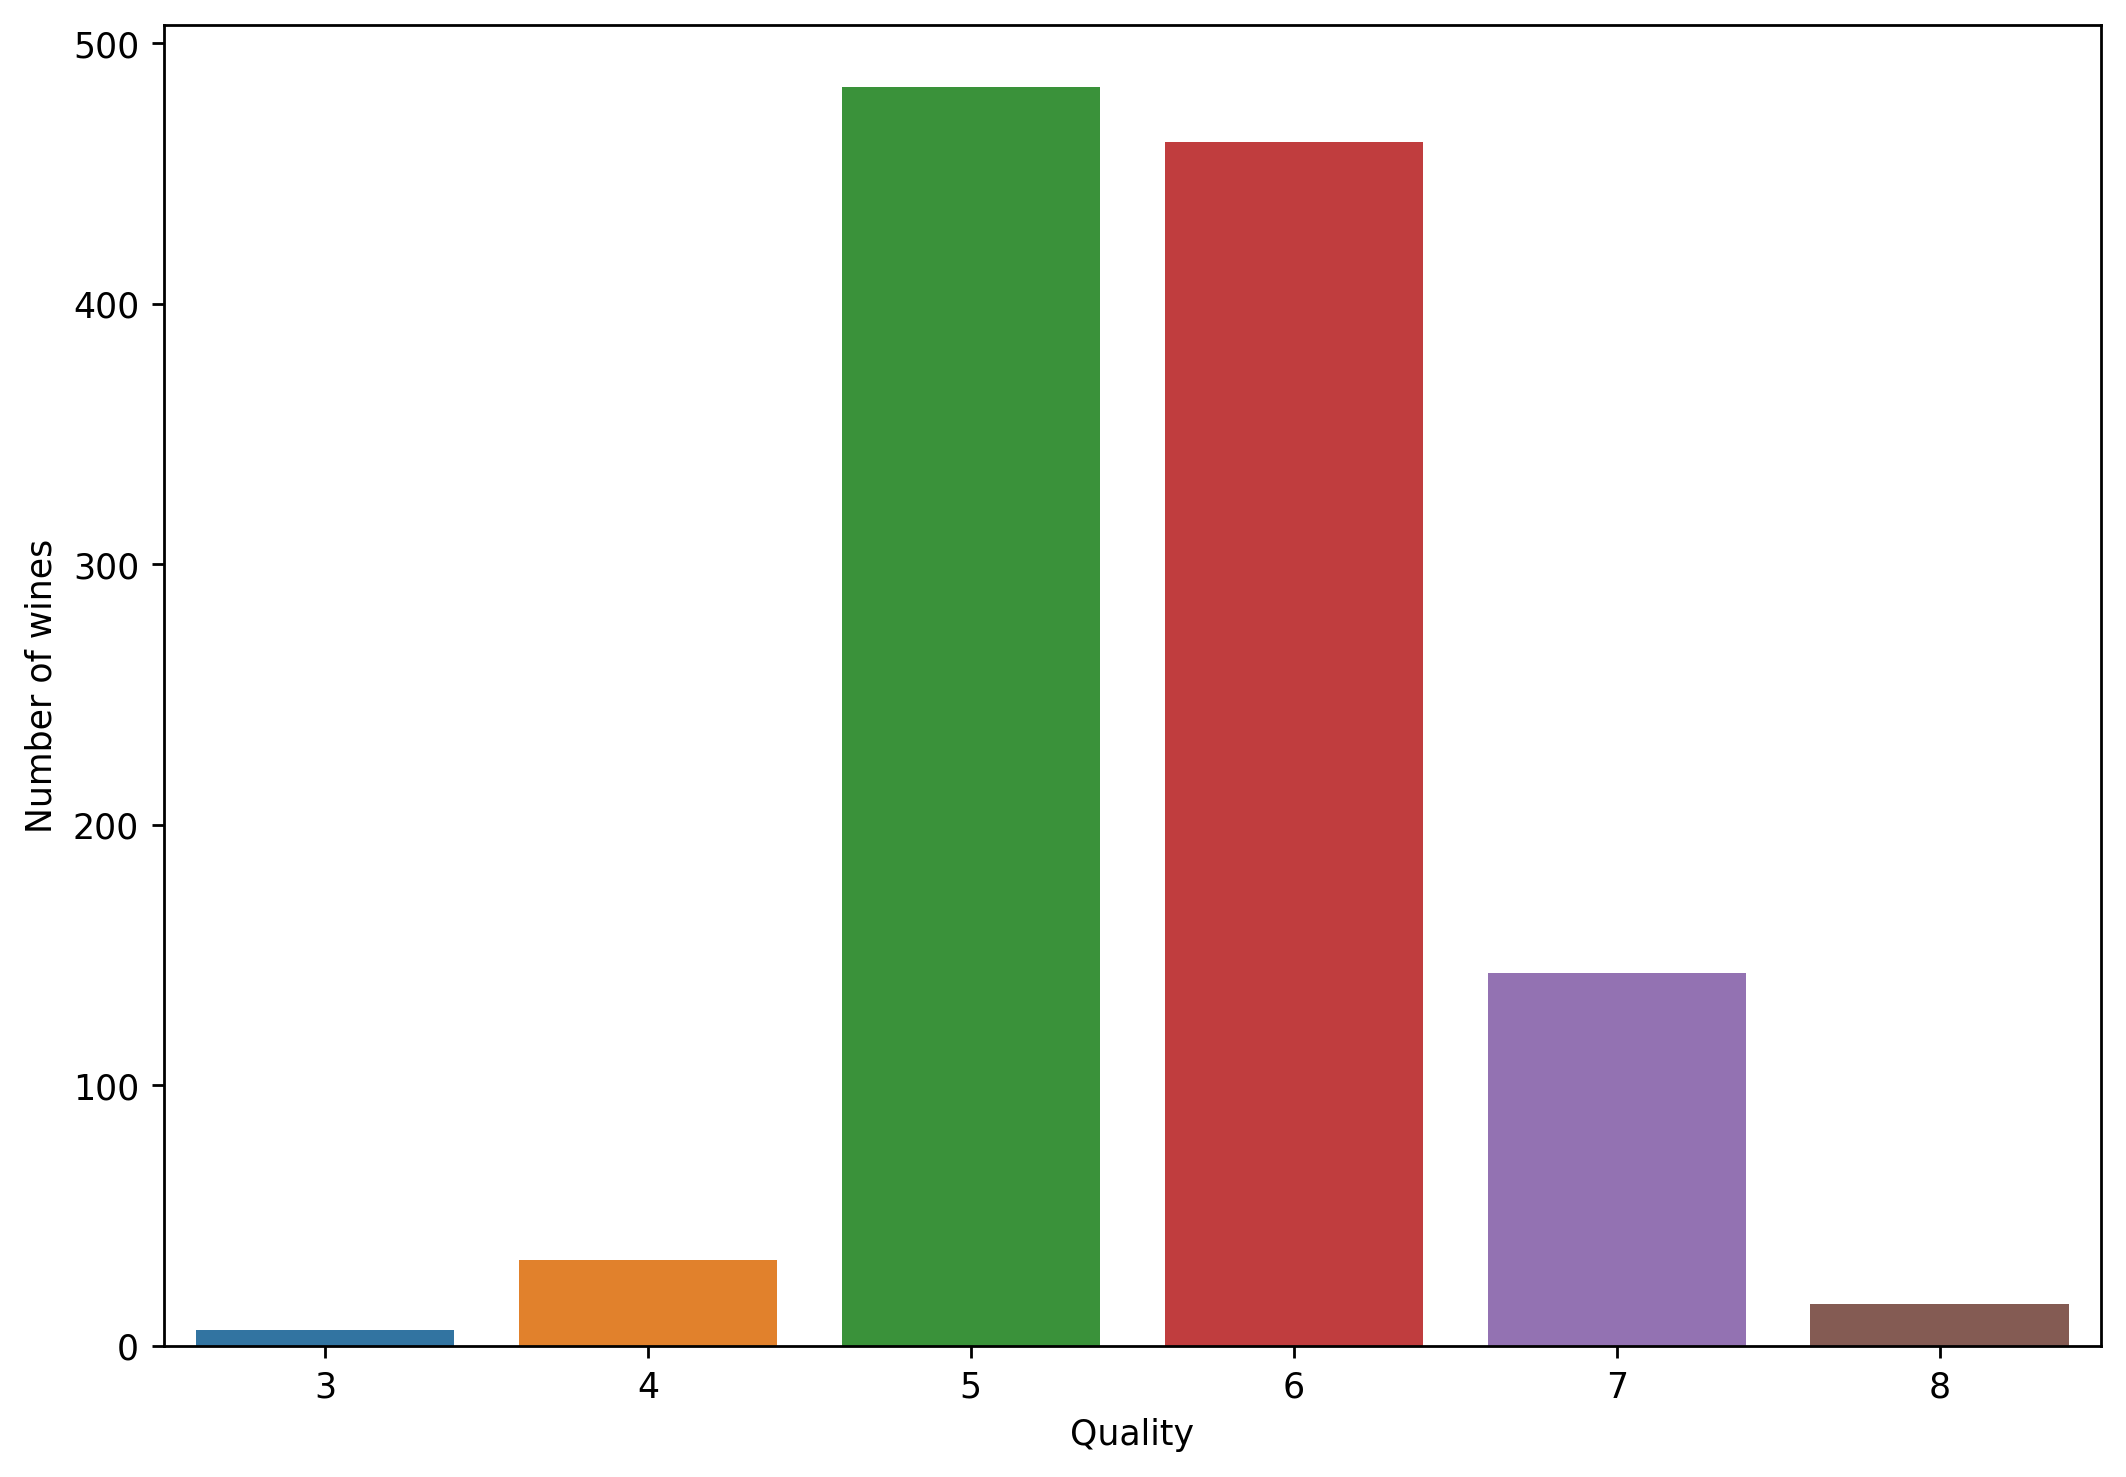

In [17]:
# Counterplot of the quality column
sns.countplot(x='quality', data=data, figure=plt.figure(figsize=(10,7), dpi=250))
plt.xlabel('Quality')
plt.ylabel('Number of wines')
plt.show()

We have to note that the classes are highly imbalanced. We will address that issue later. Now, let us compute the correlation between each feature. What we have to get is that all pairs of inputs must be uncorrelated, and each pair (input, output) must be highly correlated.

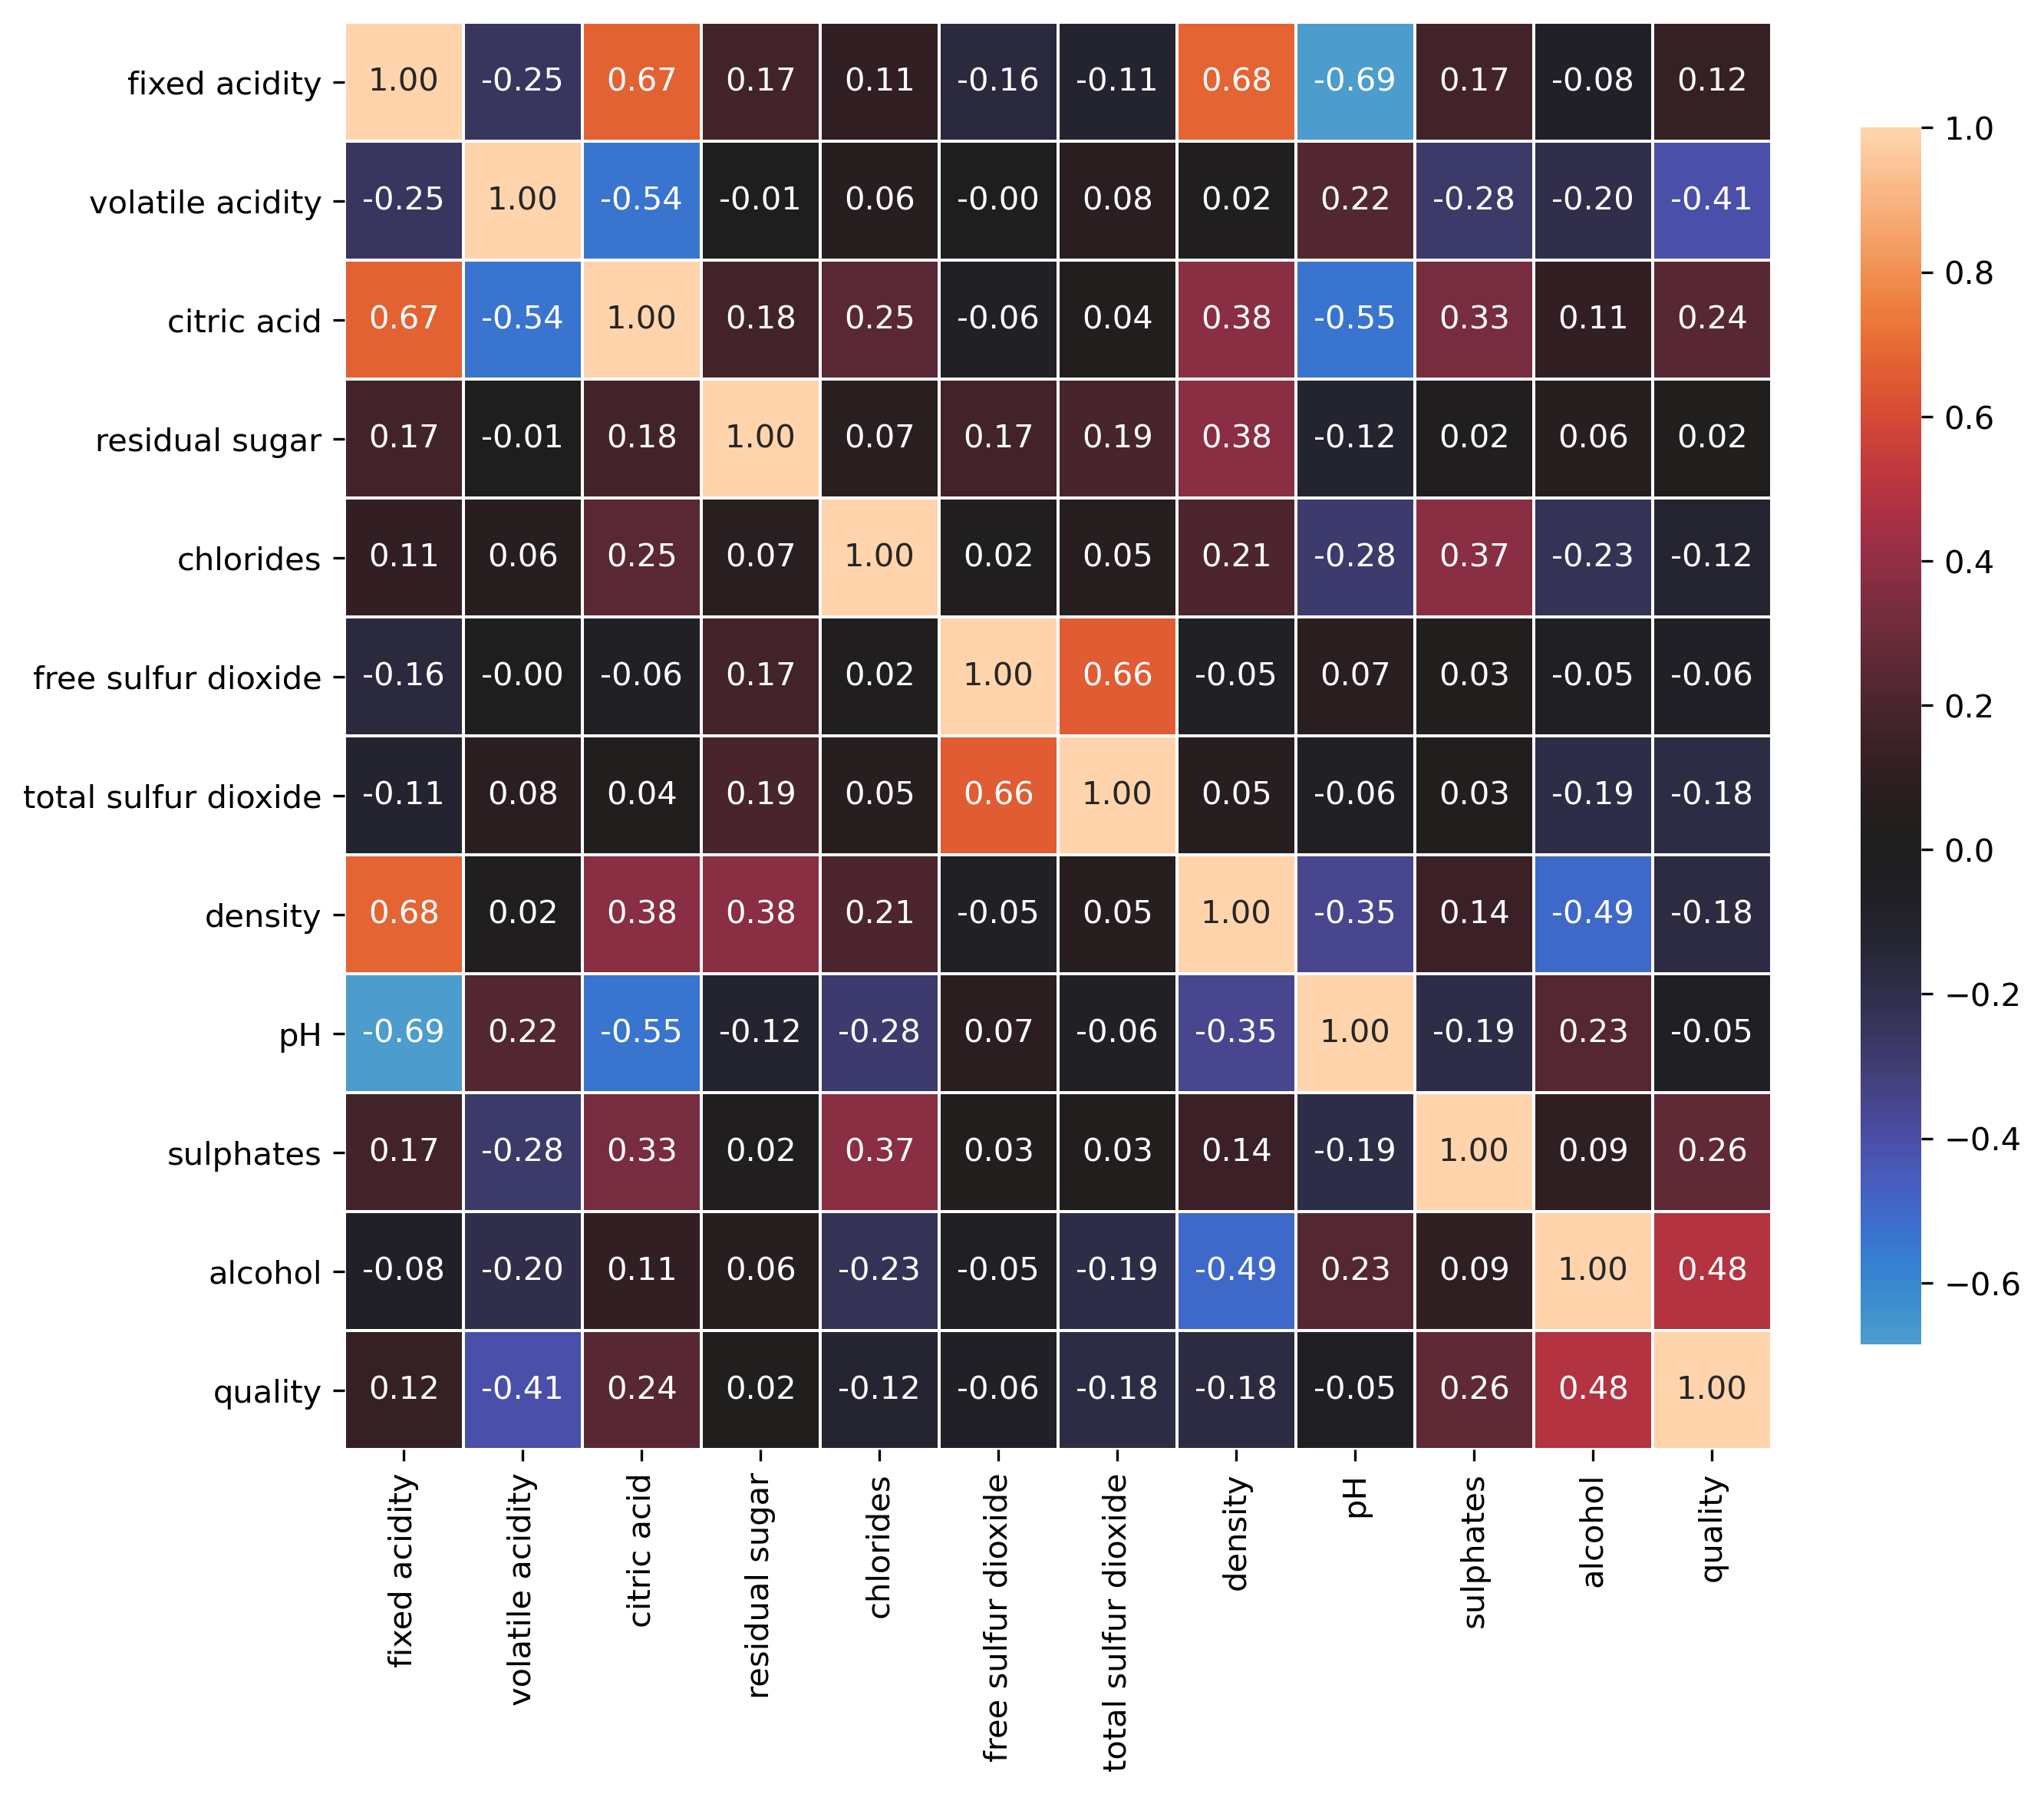

In [18]:
fig, ax = plt.subplots(figsize=(10,10), dpi=300)
sns.heatmap(data.drop(["Id"], axis=1).corr(), vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}, figure=fig)
plt.show()

We can see that there are some features that are correlated to each other. For example, the fixed acidity is highly correlated with de pH and the density of the wine. To better understand the correlation between features, let us make some pairplots.

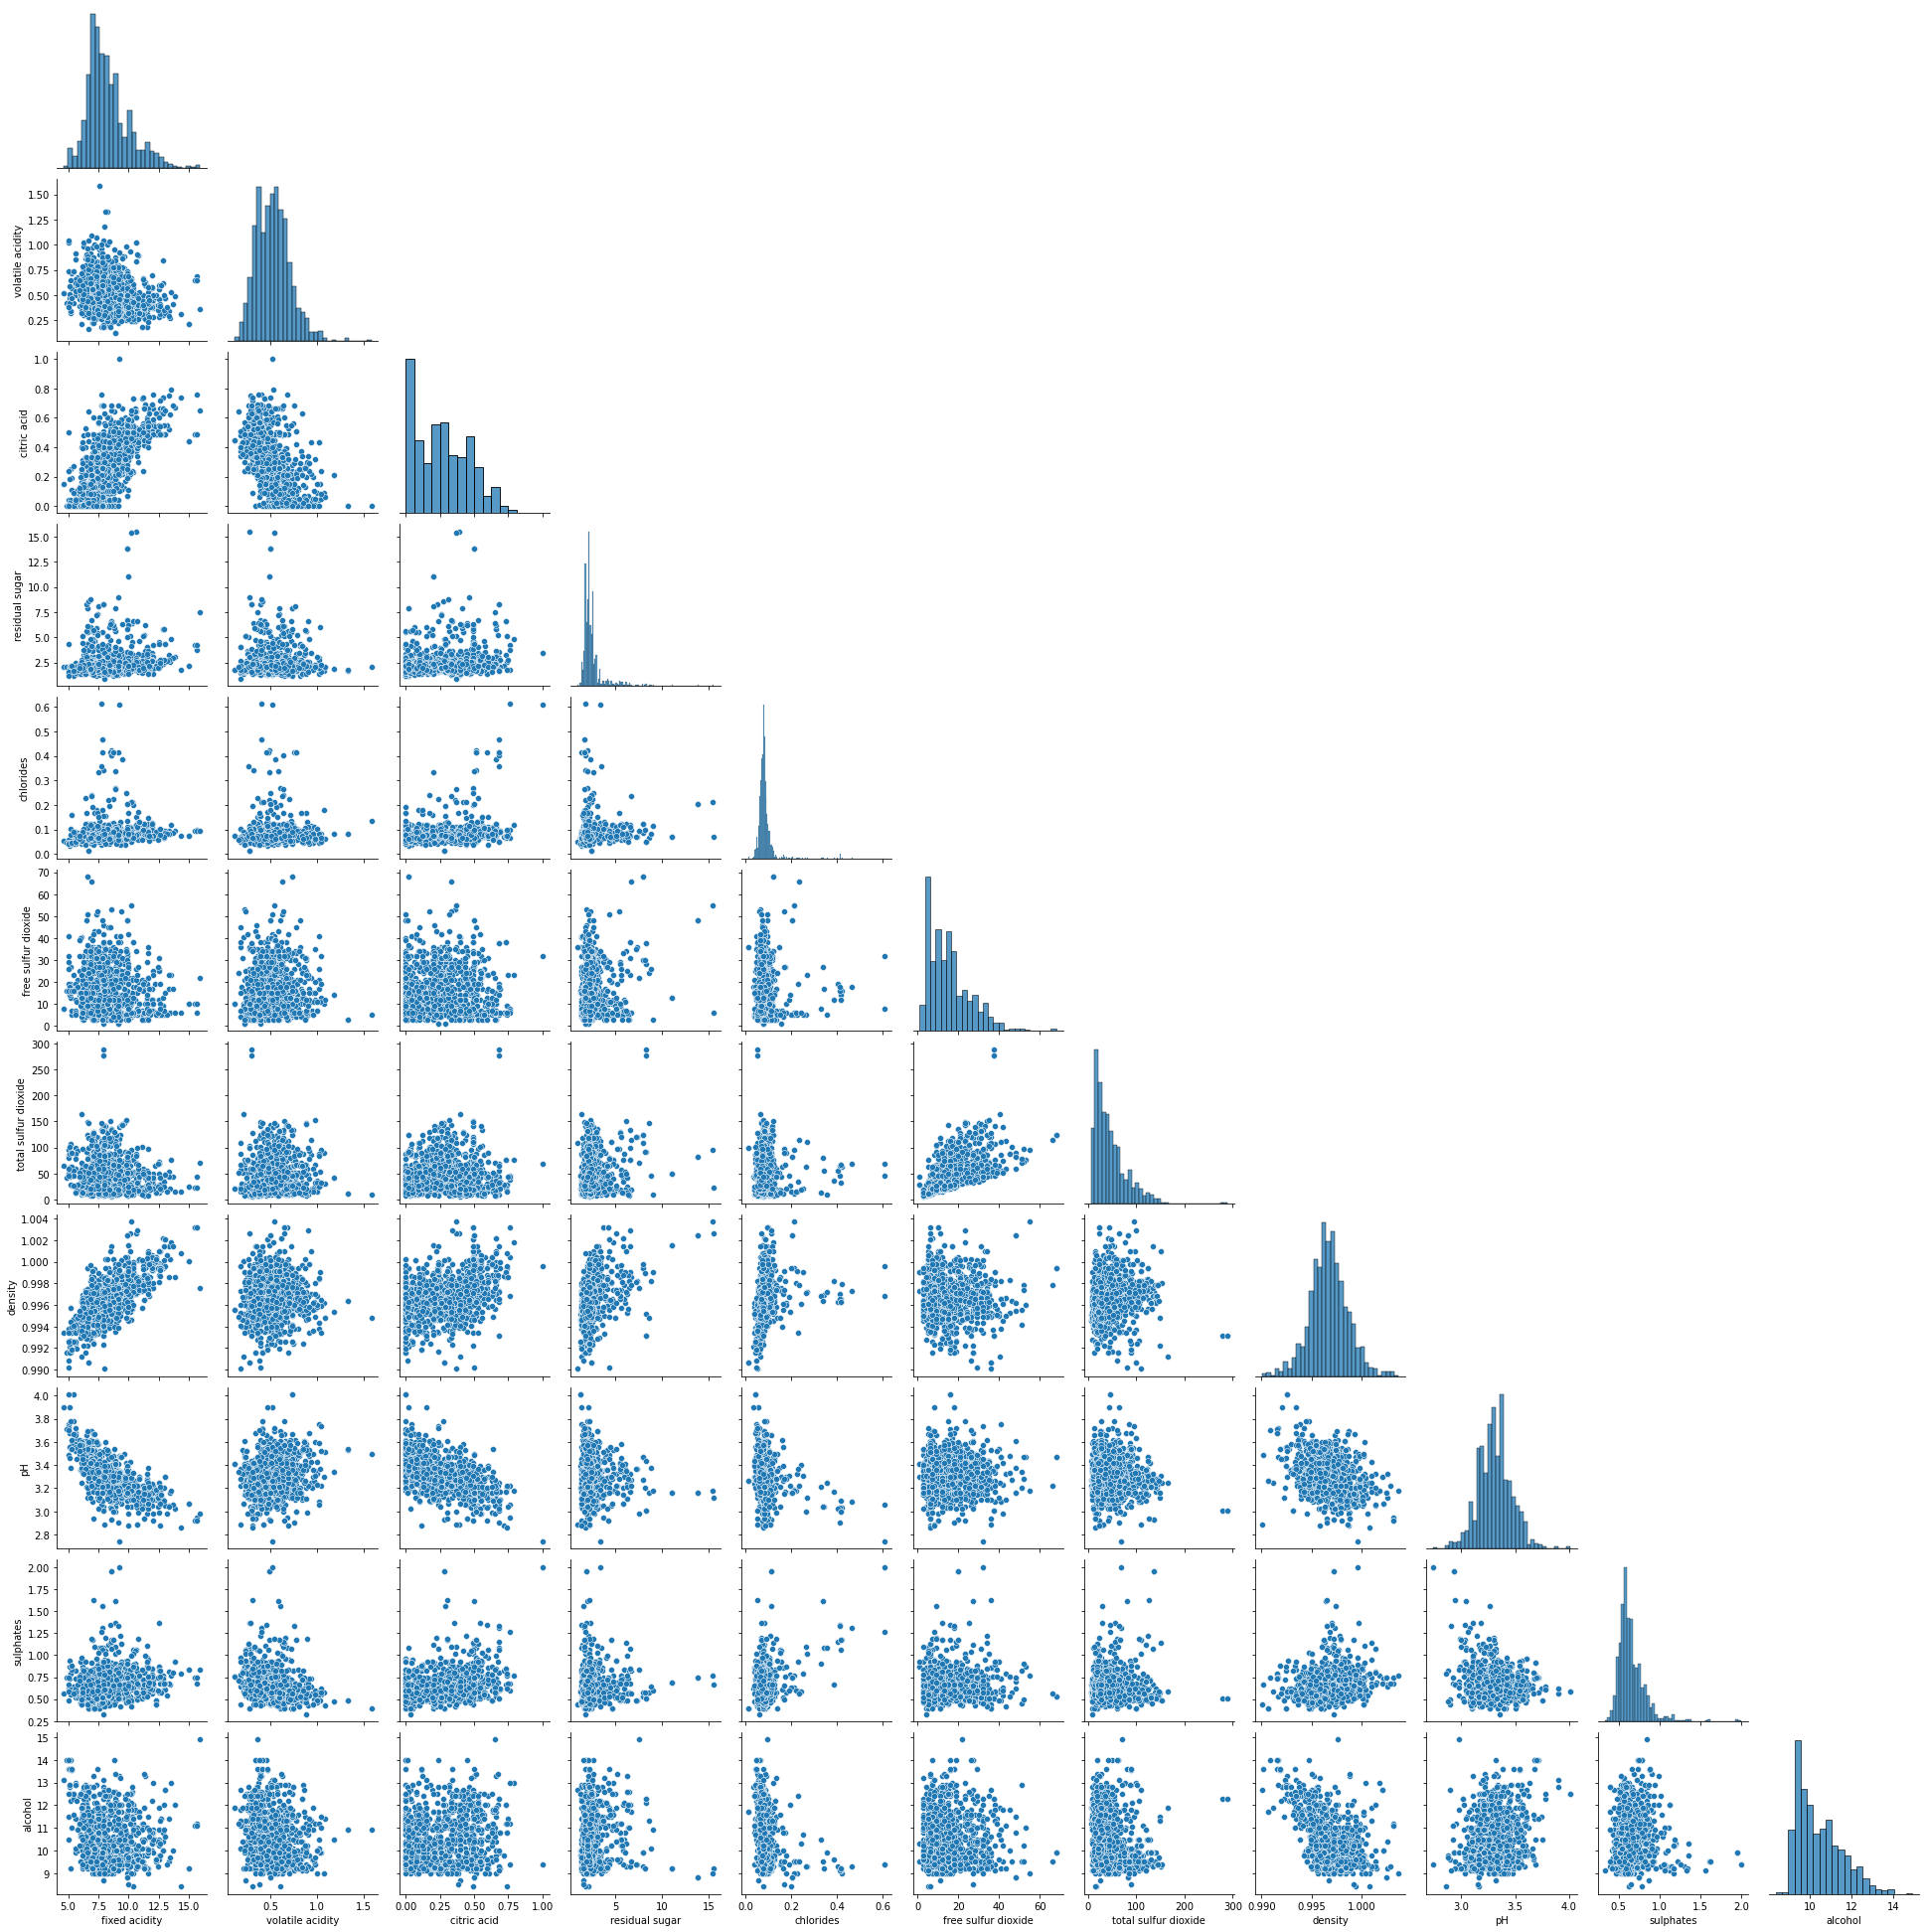

In [19]:
sns.pairplot(data.drop(["Id", "quality"], axis=1), corner=True)

To correct the problem of correlated variables we have to make use of the Principal Component Analysis (PCA) method. We will apply this technique to the features of the dataset.

In [20]:
# Let us standardize the input data using a hand-made function
def stan(column):
    return (column - column.mean())/column.std()

for col in data.columns[:11]:
    data[col] = stan(data[col])

Now we can check out the transformed data before continue with the PCA method.

In [21]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1143.000000,1143.000000
mean,-2.885609e-15,1.710210e-15,4.922377e-15,2.148957e-15,6.055426e-15,-1.245237e-16,3.760965e-16,-3.461030e-13,-1.182645e-14,7.819156e-18,1.357585e-14,5.657043,804.969379
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.805824,463.997116
min,-2.123553e+00,-2.289881e+00,-1.364429e+00,-1.203725e+00,-1.585294e+00,-1.425833e+00,-1.217575e+00,-3.459833e+00,-3.644836e+00,-1.923182e+00,-1.887008e+00,3.000000,0.000000
25%,-6.930159e-01,-7.729005e-01,-9.068469e-01,-4.662173e-01,-3.582312e-01,-8.404953e-01,-7.600085e-01,-6.027900e-01,-6.767019e-01,-6.320927e-01,-8.705556e-01,5.000000,411.000000
50%,-2.352439e-01,-6.312075e-02,-9.336693e-02,-2.449649e-01,-1.678248e-01,-2.551572e-01,-2.719377e-01,-2.618672e-02,-6.478021e-03,-2.212915e-01,-2.237224e-01,6.000000,794.000000
75%,4.514140e-01,6.049072e-01,7.709555e-01,5.003827e-02,6.489400e-02,5.252936e-01,4.601684e-01,5.789870e-01,5.679996e-01,4.242533e-01,6.079202e-01,6.000000,1209.500000
max,4.342476e+00,5.837793e+00,3.719820e+00,9.563892e+00,1.108730e+01,5.110442e+00,7.415177e+00,3.615245e+00,4.461681e+00,7.877361e+00,4.119300e+00,8.000000,1597.000000


In [22]:
# Now we have to compute the covariance matrix to this new data
cov = np.cov(data.drop(["quality", "Id"], axis=1), rowvar=False)

# Once we have the covariance matrix we need to calculate its eigenvectors (v) and eigenvalues (w)
w, v= np.linalg.eig(cov)

# We sort the columns of the eigenvector matrix and of the eigenvalue matrix by decreasing eigenvalues
idx = np.argsort(-1.0*w, axis=0)
w = w[idx]
v = v[:,idx]
cec = []

# We compute the cumulative energy content for each eigenvector
for j in range(len(w)):
    cec.append(np.sum(w[:j+1], axis=0))

cec = np.array(cec)

# We have to choose a subset of eigenvectors as basis vectors. Let us find the Lth component of cec such that cec[L]/cec[-1] > 0.9
L = np.argwhere(cec/cec[-1] > 0.9)[0]

# We chose a subset of eigenvector as basis vectors
basis = v[:,:L[0]+1]

# We project the data onto the new basis
trasnformed_data = np.matmul(data.drop(["Id", "quality"], axis=1), basis)

Now we have transformed the data let us see the degree of correlation between each new features

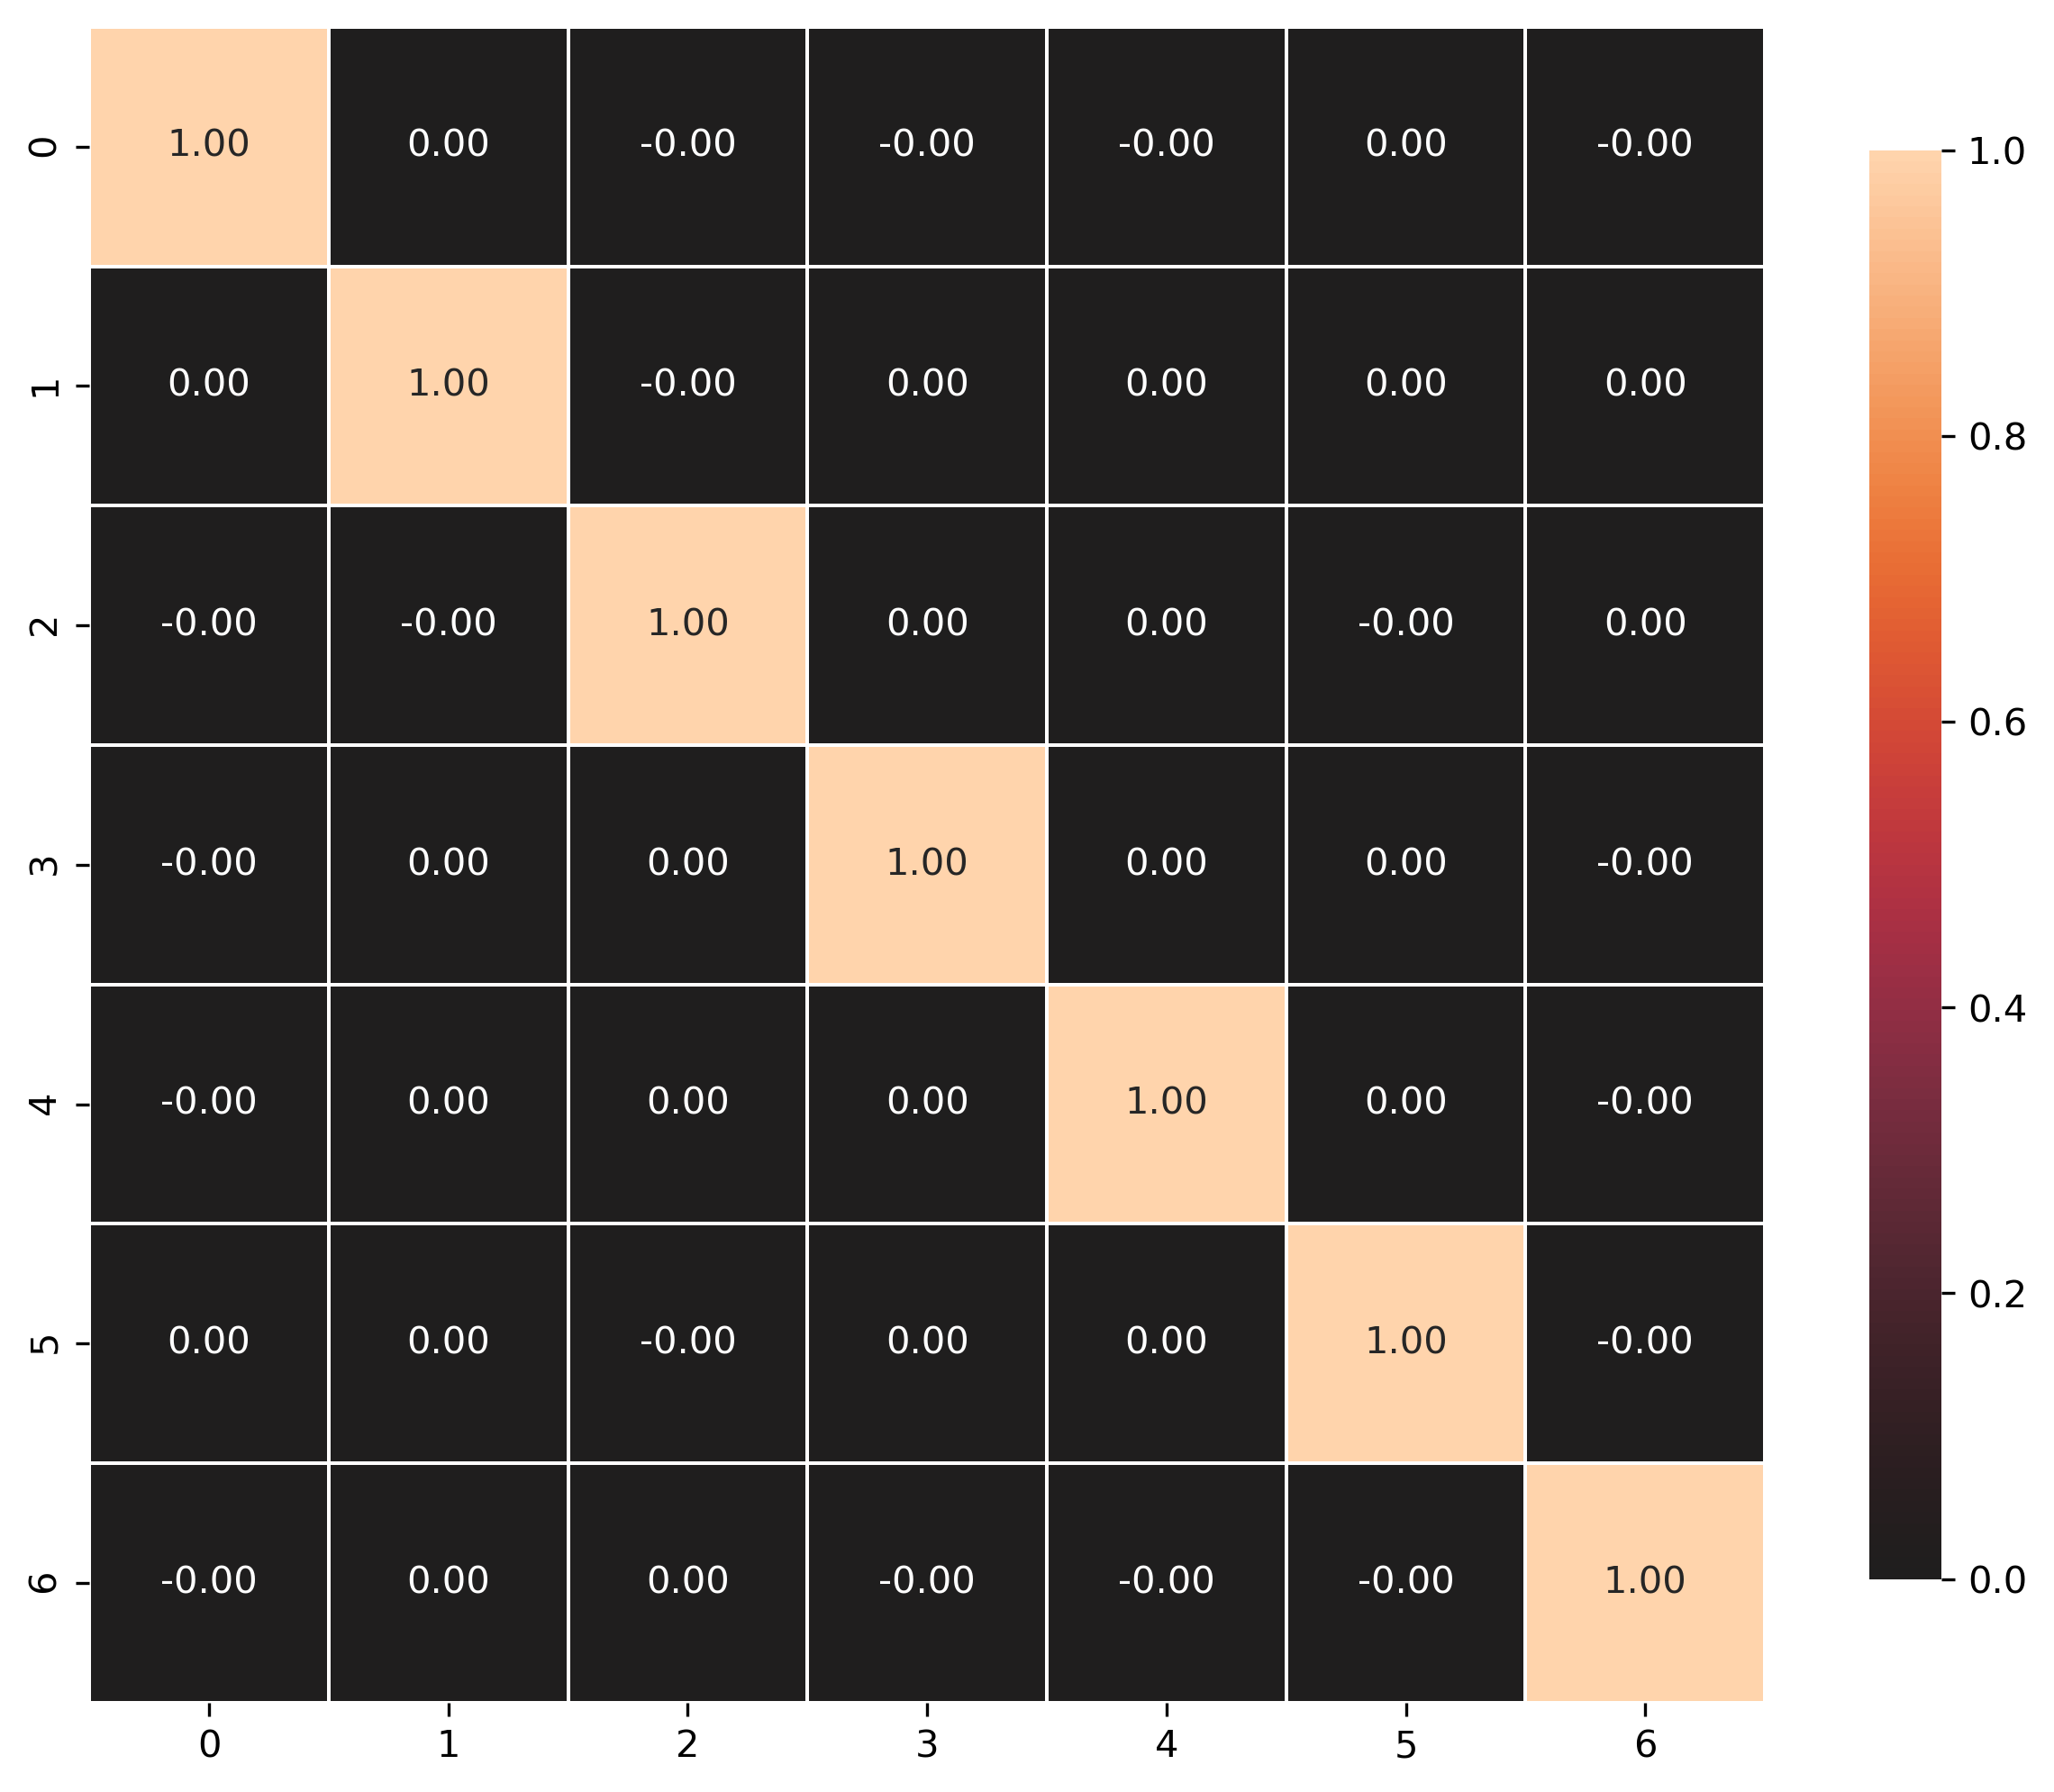

In [23]:
fig, ax = plt.subplots(figsize=(10,10), dpi=300)
sns.heatmap(trasnformed_data.corr(), vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}, figure=fig)
plt.show()

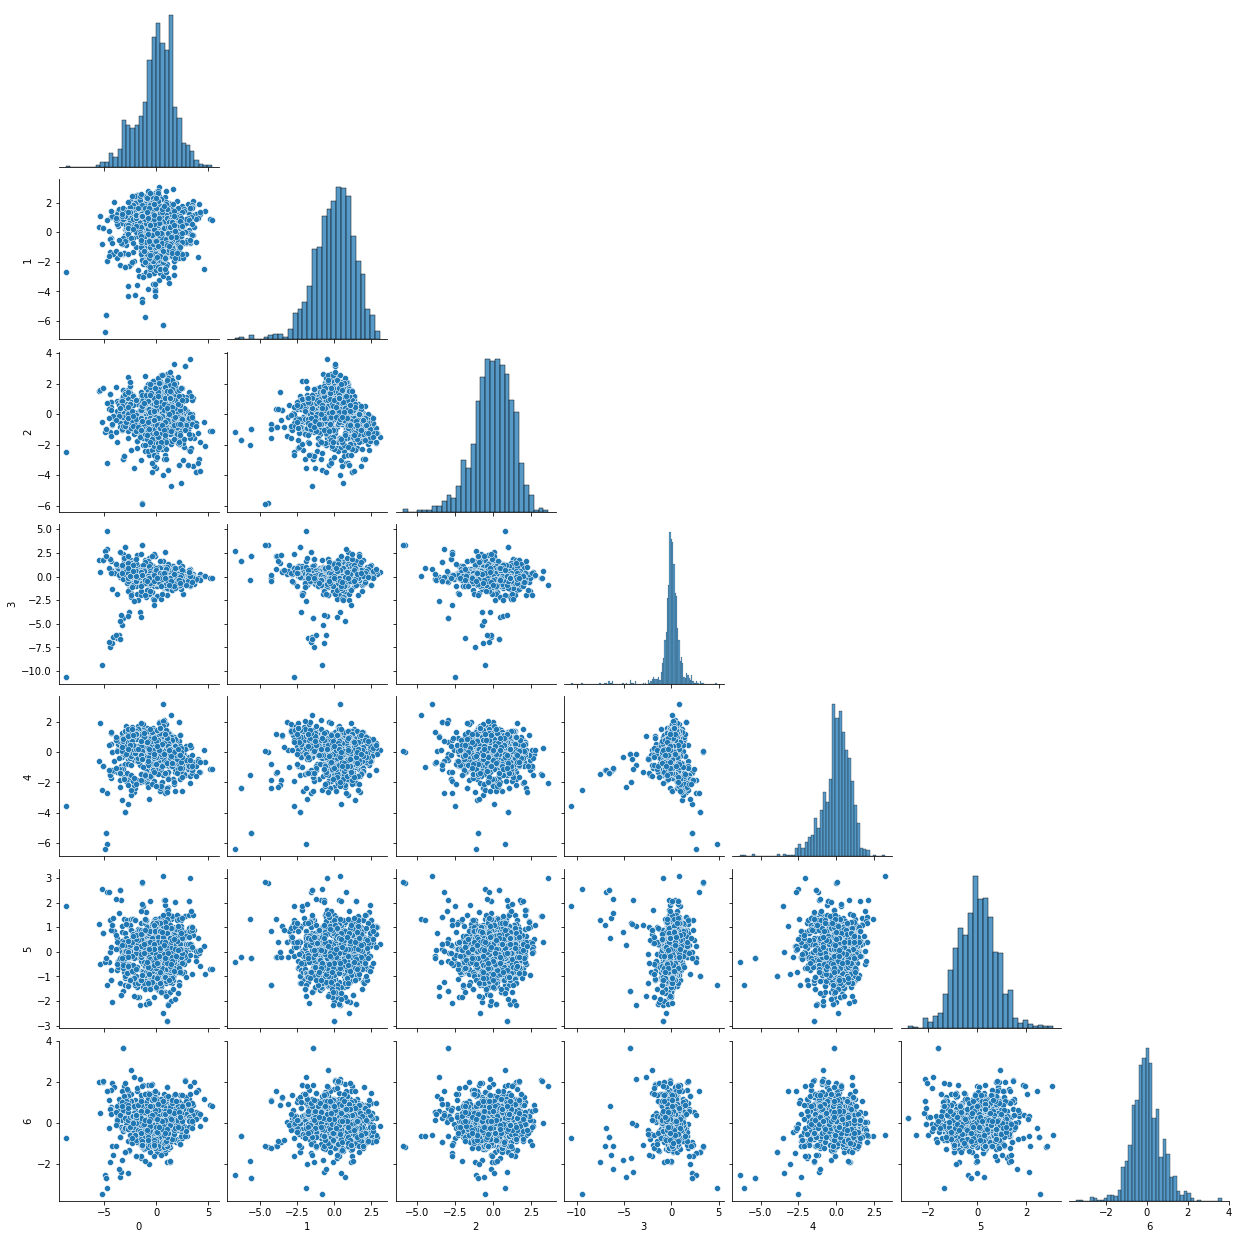

In [24]:
sns.pairplot(trasnformed_data, corner=True)

Let us se, now, the correlation between this new variables and the quality column

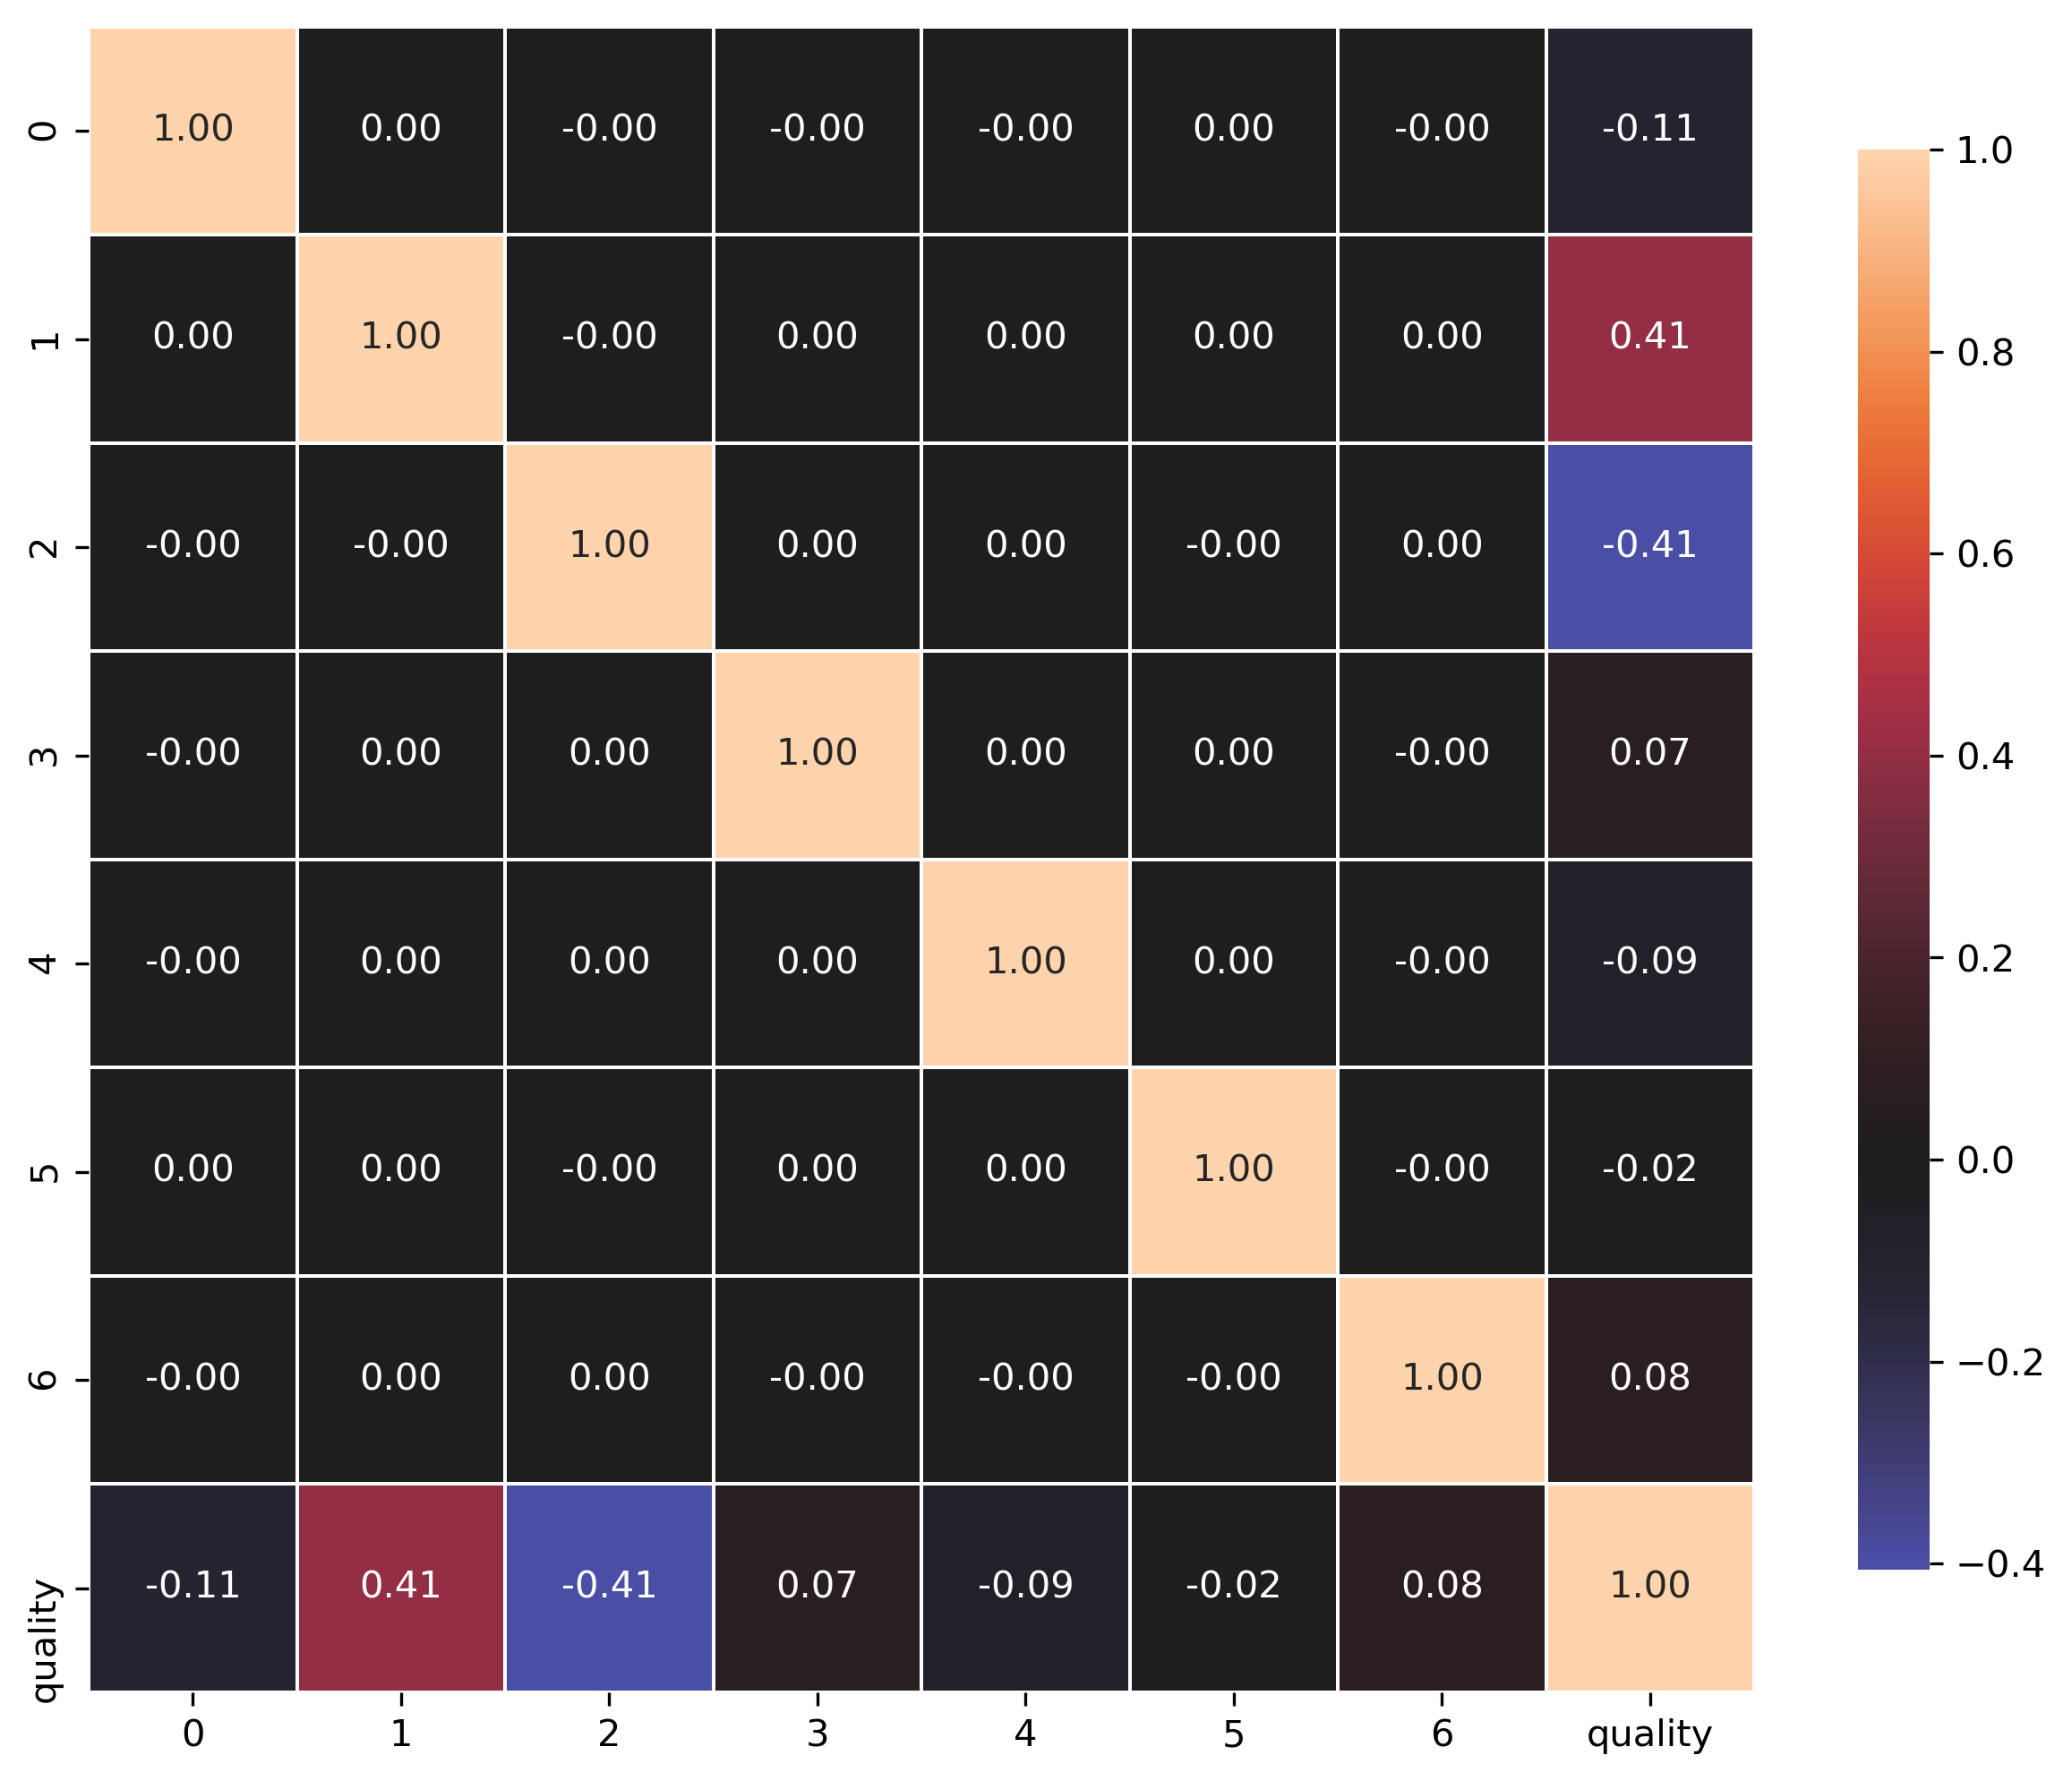

In [30]:
data_conc = pd.concat((trasnformed_data, data["quality"]), axis=1)
fig, ax = plt.subplots(figsize=(10,10), dpi=300)
sns.heatmap(data_conc.corr(), vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}, figure=fig)
plt.show()

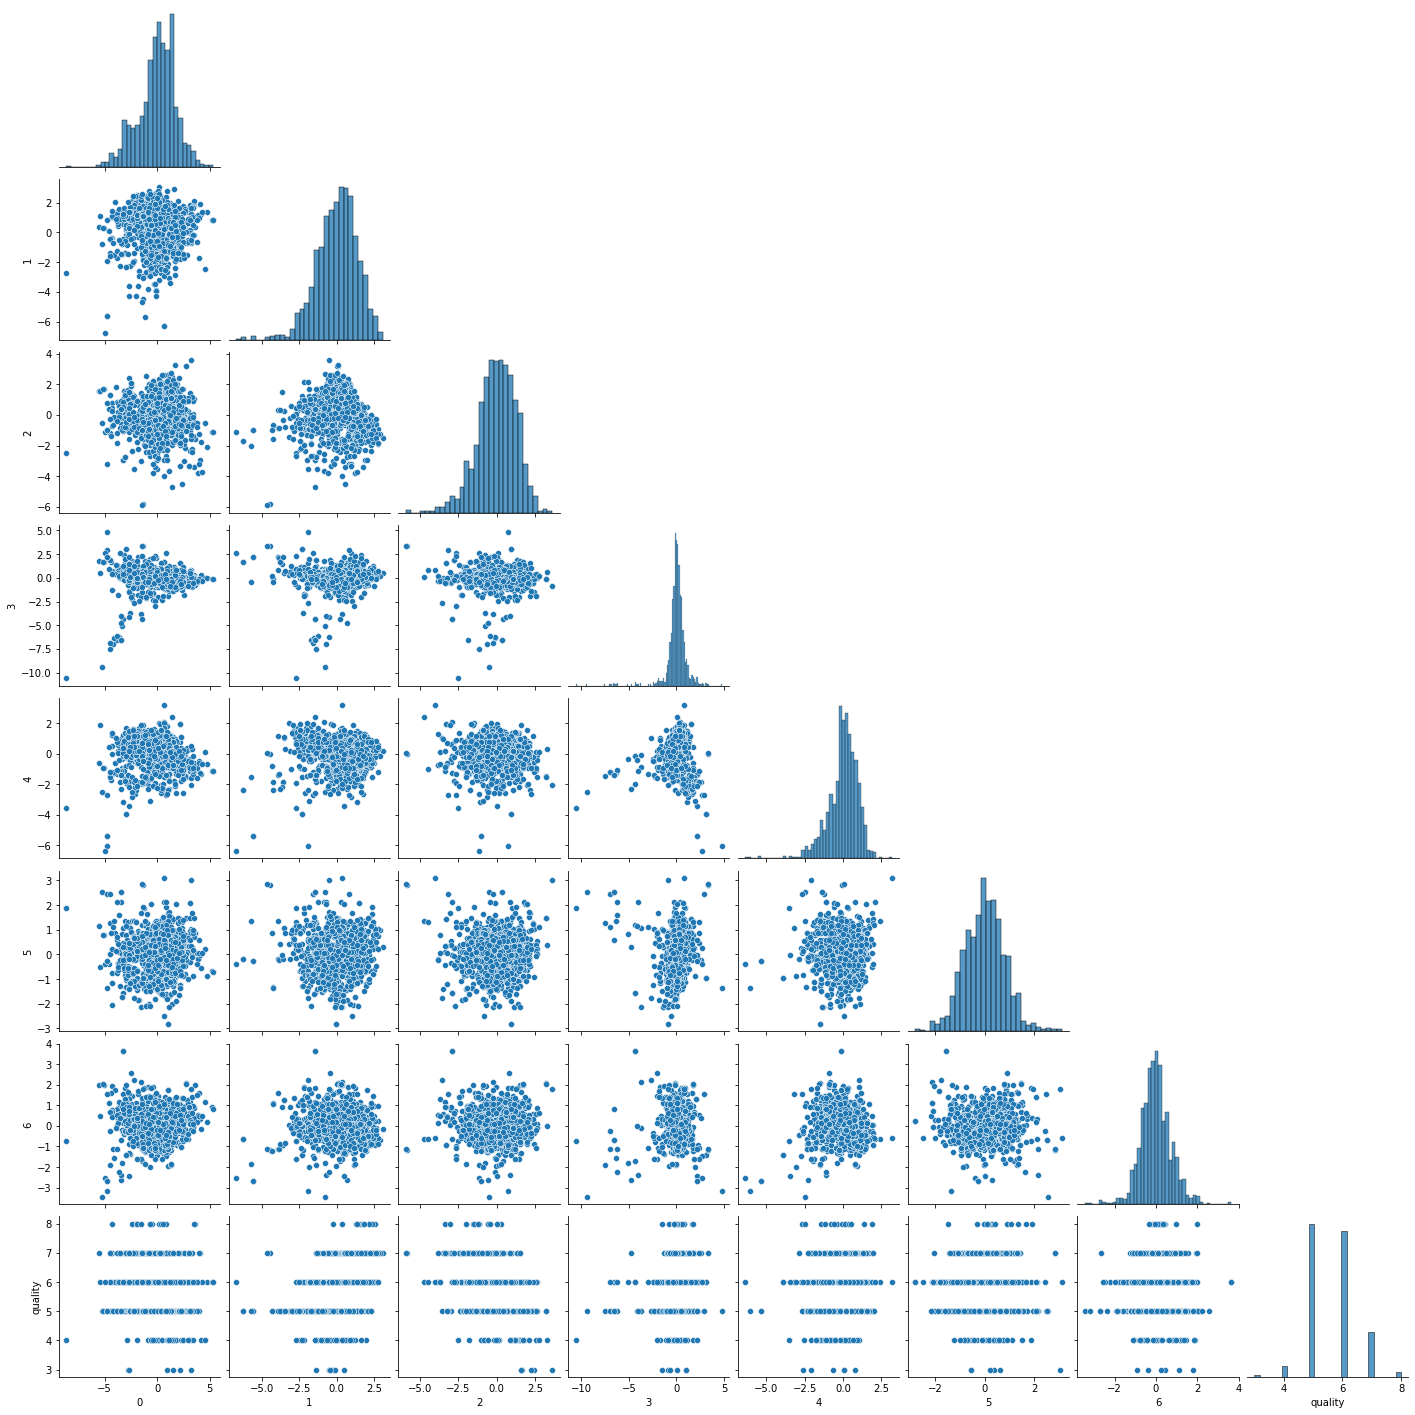

In [31]:
sns.pairplot(data_conc, corner=True)

Just to finish to understand the new data let us get some information about it

In [28]:
trasnformed_data.describe()

,0,1,2,3,4,5,6
count,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03
mean,1.331390e-13,7.850200e-14,-1.221258e-13,-5.829040e-14,4.768068e-14,1.528151e-13,-5.441326e-14
std,1.776558e+00,1.370497e+00,1.254453e+00,1.100684e+00,9.788838e-01,8.157016e-01,7.467244e-01
min,-8.665998e+00,-6.743622e+00,-5.908715e+00,-1.059444e+01,-6.374277e+00,-2.823386e+00,-3.444404e+00
25%,-9.391112e-01,-8.023978e-01,-7.561378e-01,-2.720578e-01,-4.248131e-01,-5.558045e-01,-4.567260e-01
50%,1.865538e-01,1.299471e-01,7.527427e-02,5.638919e-02,1.111624e-01,-5.561341e-03,-3.695319e-02
75%,1.260241e+00,9.395599e-01,9.158318e-01,4.351905e-01,6.455890e-01,5.403059e-01,4.380190e-01
max,5.316092e+00,3.081872e+00,3.614423e+00,4.797377e+00,3.194882e+00,3.095629e+00,3.651733e+00


We can see that the new data is completly uncorrelated, so we can proced to the next step, to define a machine learning algorithm that can predict the column $quality$ of the original dataset.

In [25]:
# The inputs of the model will be X
X = trasnformed_data

# The targets of the model will be Y
Y = data["quality"]

In [26]:
# Let us split the inputs and targets into train data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=2)

In [27]:
# Let us check the shapes of the new datasets
print('X_train.shape =', X_train.shape, 'X_test.shape =', X_test.shape, 'Y_train.shape =', Y_train.shape, 'Y_test.shape =', Y_test.shape)

X_train.shape = (971, 7) X_test.shape = (172, 7) Y_train.shape = (971,) Y_test.shape = (172,)


Before we continue with the process of defining and training a model, we have to deal with the imbalanced issue. Let us check the number of counts of each class.

In [34]:
print(data["quality"].value_counts())

# import library
#from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(random_state=42)

# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)

#print('Original dataset shape', Counter(y))
#print('Resample dataset shape', Counter(y_ros))

# puedo probar con from sklearn.ensemble import RandomForestClassifier ---> rfc = RandomForestClassifier()


5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64


### References
[1] [Decision Tree Algorithm for Multiclass problems using Python](https://towardsdatascience.com/decision-tree-algorithm-for-multiclass-problems-using-python-6b0ec1183bf5)

[2] [10 Techniques to deal with Imbalanced Classes in Machine Learning](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

[3] [Machine Learning Course for Beginners](https://www.youtube.com/watch?v=NWONeJKn6kc&t=13661s&ab_channel=freeCodeCamp.org)

[4] [Multi-Class Imbalanced Classification](https://machinelearningmastery.com/multi-class-imbalanced-classification/)